In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 4.69MB/s]


In [ ]:
df=pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
type(df.fillna(1,inplace=True))

NoneType

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [ ]:
#shape of dataset
df.shape

(8807, 12)

# Dataset Unesting (using split , stack and merge)

In [ ]:
df['cast']

,cast
0,NaN
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,NaN
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
...,...
8802,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8803,NaN
8804,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [ ]:
def unest_column(dataframe,col,delimiter=', ',key='show_id'):
  new_df = df[[key, col]]
  new_df.loc[:,col] = new_df[col].str.split(', ')
  exploded_df = new_df.explode(col)
  return exploded_df


In [ ]:
unested_cast_df=unest_column(df,'cast')
unested_listed_df=unest_column(df,'listed_in')
unested_director_df=unest_column(df,'director')
unested_country_df=unest_column(df,'country')

unested_country_df

,show_id,country
0,s1,United States
1,s2,South Africa
2,s3,NaN
3,s4,NaN
4,s5,India
...,...,...
8802,s8803,United States
8803,s8804,NaN
8804,s8805,United States
8805,s8806,United States


In [ ]:
# create data frame for leftover columns

leftover_df=df[['show_id','type','title','date_added','release_year','rating','duration','description']]
leftover_df.set_index('show_id',inplace=True)
leftover_df

,type,title,date_added,release_year,rating,duration,description
show_id,,,,,,,
s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,"November 20, 2019",2007,R,158 min,"A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,"July 1, 2019",2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,"November 1, 2019",2009,R,88 min,Looking to survive in a world taken over by zo...


# Merge unested dataframes

In [ ]:
#List of dataframes to be merged

dataframes=[unested_cast_df,unested_listed_df,unested_director_df,unested_country_df,leftover_df]

merged_df=dataframes[0]

for df in dataframes[1:]:
  merged_df=pd.merge(merged_df,df,on='show_id',how='outer')

merged_df

,show_id,cast,listed_in,director,country,type,title,date_added,release_year,rating,duration,description
0,s1,NaN,Documentaries,Kirsten Johnson,United States,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,s10,Melissa McCarthy,Comedies,Theodore Melfi,United States,Movie,The Starling,"September 24, 2021",2021,PG-13,104 min,A woman adjusting to life after a loss contend...
2,s10,Melissa McCarthy,Dramas,Theodore Melfi,United States,Movie,The Starling,"September 24, 2021",2021,PG-13,104 min,A woman adjusting to life after a loss contend...
3,s10,Chris O'Dowd,Comedies,Theodore Melfi,United States,Movie,The Starling,"September 24, 2021",2021,PG-13,104 min,A woman adjusting to life after a loss contend...
4,s10,Chris O'Dowd,Dramas,Theodore Melfi,United States,Movie,The Starling,"September 24, 2021",2021,PG-13,104 min,A woman adjusting to life after a loss contend...
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s998,David Attenborough,Docuseries,NaN,United Kingdom,TV Show,Life in Color with David Attenborough,"April 22, 2021",2021,TV-PG,1 Season,"Using innovative technology, this docuseries e..."
201987,s998,David Attenborough,International TV Shows,NaN,Australia,TV Show,Life in Color with David Attenborough,"April 22, 2021",2021,TV-PG,1 Season,"Using innovative technology, this docuseries e..."
201988,s998,David Attenborough,International TV Shows,NaN,United Kingdom,TV Show,Life in Color with David Attenborough,"April 22, 2021",2021,TV-PG,1 Season,"Using innovative technology, this docuseries e..."
201989,s999,Ma Anand Sheela,Documentaries,NaN,India,Movie,Searching For Sheela,"April 22, 2021",2021,TV-14,58 min,Journalists and fans await Ma Anand Sheela as ...


In [ ]:
merged_df.shape

(201991, 12)

In [ ]:
merged_df.columns

Index(['show_id', 'cast', 'listed_in', 'director', 'country', 'type', 'title',
       'date_added', 'release_year', 'rating', 'duration', 'description'],
      dtype='object')

Now we can clearly see that number of rows have increased from (8807, 12) to (201991, 12) after unesting.

# Data Cleaning and Data Imputation

In [ ]:
# Data cleaning

# Typecast date_added column from string to date time

# Strip leading/trailing spaces
merged_df['date_added'] = merged_df['date_added'].str.strip()

merged_df['date_added']=pd.to_datetime(merged_df['date_added'])

type(merged_df['date_added'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# split the duration column into two separate columns—one for the numerical magnitude (e.g., 90, 2, 111) and another for the duration type (e.g., "min", "Seasons"),
# Extract the numeric part and the text part
# The regex pattern (\d+) captures the numeric part, and ([a-zA-Z]+) captures the text part.

#merged_df['duration_magnitude'] = merged_df['duration'].str.extract(r'(\d+)',errors='coerce').astype(int)
#merged_df['duration_type'] = merged_df['duration'].str.extract(r'([a-zA-Z]+)')

merged_df['duration_magnitude'] = pd.to_numeric(merged_df['duration'].str.extract(r'(\d+)')[0], errors='coerce')
merged_df['duration_type'] = merged_df['duration'].str.extract(r'([a-zA-Z]+)')
merged_df.drop(columns=['duration'], inplace=True)

merged_df.head()

,show_id,cast,listed_in,director,country,type,title,date_added,release_year,rating,description,duration_magnitude,duration_type
0,s1,NaN,Documentaries,Kirsten Johnson,United States,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",90.0,min
1,s10,Melissa McCarthy,Comedies,Theodore Melfi,United States,Movie,The Starling,2021-09-24,2021,PG-13,A woman adjusting to life after a loss contend...,104.0,min
2,s10,Melissa McCarthy,Dramas,Theodore Melfi,United States,Movie,The Starling,2021-09-24,2021,PG-13,A woman adjusting to life after a loss contend...,104.0,min
3,s10,Chris O'Dowd,Comedies,Theodore Melfi,United States,Movie,The Starling,2021-09-24,2021,PG-13,A woman adjusting to life after a loss contend...,104.0,min
4,s10,Chris O'Dowd,Dramas,Theodore Melfi,United States,Movie,The Starling,2021-09-24,2021,PG-13,A woman adjusting to life after a loss contend...,104.0,min


In [ ]:
# Data Imputation

# Loop through each column and print the count of NaN values\

for col in merged_df.columns:
  nan_count=merged_df[col].isna().sum()
  print("Column ",col," has ",nan_count," NaN values and NAN% is ",nan_count)



Column  show_id  has  0  NaN values and NAN% is  0.0
Column  cast  has  2146  NaN values and NAN% is  1.0624235733275245
Column  listed_in  has  0  NaN values and NAN% is  0.0
Column  director  has  50643  NaN values and NAN% is  25.07190914446683
Column  country  has  11897  NaN values and NAN% is  5.889866380185256
Column  type  has  0  NaN values and NAN% is  0.0
Column  title  has  0  NaN values and NAN% is  0.0
Column  date_added  has  158  NaN values and NAN% is  0.07822130688991093
Column  release_year  has  0  NaN values and NAN% is  0.0
Column  rating  has  67  NaN values and NAN% is  0.033169794693822995
Column  description  has  0  NaN values and NAN% is  0.0
Column  duration_magnitude  has  3  NaN values and NAN% is  0.0014852146877831192
Column  duration_type  has  3  NaN values and NAN% is  0.0014852146877831192


1. Director -> Categorical data but 25% NAN values , so mode doesn't seems to be a suitable choice. Lets replace it with 'Unknown'
2. Cast -> Categorical data, and approx 1% NAN values, so use mode under particular Country
3. Country -> mode under particular director (handle case where director is unknown)
4. date_added -> keep it NAN
5. Rating -> 0.033% -> simply replace with mode
6. Magnitude -> replace with mean of particular duration type
7. duration type -> Compare to type and add unit

In [ ]:
# Data imputation for Director with string 'Unknown'
imputed_df=merged_df
imputed_df['director'].fillna("Unknown",inplace=True)
imputed_df['director'].isna().sum()

0

In [ ]:
# Data imputation for Country with mode group by particular Director of that row

def fill_country_with_mode(group):
    # Check if there's a mode for the group, fill NaN if it exists
    if not group['country'].mode().empty:
        mode_cast = group['country'].mode()[0] if not group['country'].mode().empty else None
        group['country'] = group['country'].fillna(mode_cast)
    return group

# Ensure the groupby and apply are returning correctly shaped DataFrame
imputed_df = imputed_df.groupby('director', group_keys=False).apply(fill_country_with_mode)

imputed_df['country'].isna().sum()


<ipython-input-19-47eb75097dd1>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  imputed_df = imputed_df.groupby('director', group_keys=False).apply(fill_country_with_mode)


4276

In [ ]:
# Data imputation for Cast with mode group by particular Country of that row

def fill_cast_with_mode(group):
    # Check if there's a mode for the group, fill NaN if it exists
    if not group['cast'].mode().empty:
        mode_cast = group['cast'].mode()[0] if not group['cast'].mode().empty else None
        group['cast'] = group['cast'].fillna(mode_cast)
    return group

# Ensure the groupby and apply are returning correctly shaped DataFrame
imputed_df = imputed_df.groupby('country', group_keys=False).apply(fill_cast_with_mode)

imputed_df['cast'].isna().sum()


<ipython-input-20-b28f687e5c71>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  imputed_df = imputed_df.groupby('country', group_keys=False).apply(fill_cast_with_mode)


13

In [ ]:
# Data imputation for Rating with mode group by particular Director of that row

def fill_rating_with_mode(group):
    # Check if there's a mode for the group, fill NaN if it exists
    if not group['rating'].mode().empty:
        mode_cast = group['rating'].mode()[0] if not group['rating'].mode().empty else None
        group['rating'] = group['rating'].fillna(mode_cast)
    return group

# Ensure the groupby and apply are returning correctly shaped DataFrame
imputed_df = imputed_df.groupby('director', group_keys=False).apply(fill_rating_with_mode)

imputed_df['rating'].isna().sum()

<ipython-input-21-c2d68fbe823c>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  imputed_df = imputed_df.groupby('director', group_keys=False).apply(fill_rating_with_mode)


7

In [ ]:
# Assign 'min' if the 'type' is 'Movie', otherwise 'Seasons'
imputed_df['duration_type'] = imputed_df['type'].apply(lambda x: 'min' if x == 'Movie' else 'Seasons')

# Checking the number of NaN values in 'duration_type'
print(imputed_df['duration_type'].isna().sum())


0


In [ ]:
# Data imputation for duration with mean group by particular type of that row

def fill_duration_with_mean(group):
    # Check if there's a mode for the group, fill NaN if it exists
    mean_duration = group['duration_magnitude'].mean()
    group['duration_magnitude'] = group['duration_magnitude'].fillna(mean_duration)
    return group

# Ensure the groupby and apply are returning correctly shaped DataFrame
imputed_df = imputed_df.groupby('type', group_keys=False).apply(fill_duration_with_mean)

imputed_df['duration_magnitude'].isna().sum()

<ipython-input-23-dc74e883db0e>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  imputed_df = imputed_df.groupby('type', group_keys=False).apply(fill_duration_with_mean)


0

In [ ]:
imputed_df

,show_id,cast,listed_in,director,country,type,title,date_added,release_year,rating,description,duration_magnitude,duration_type
0,s1,James Franco,Documentaries,Kirsten Johnson,United States,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",90.0,min
1,s10,Melissa McCarthy,Comedies,Theodore Melfi,United States,Movie,The Starling,2021-09-24,2021,PG-13,A woman adjusting to life after a loss contend...,104.0,min
2,s10,Melissa McCarthy,Dramas,Theodore Melfi,United States,Movie,The Starling,2021-09-24,2021,PG-13,A woman adjusting to life after a loss contend...,104.0,min
3,s10,Chris O'Dowd,Comedies,Theodore Melfi,United States,Movie,The Starling,2021-09-24,2021,PG-13,A woman adjusting to life after a loss contend...,104.0,min
4,s10,Chris O'Dowd,Dramas,Theodore Melfi,United States,Movie,The Starling,2021-09-24,2021,PG-13,A woman adjusting to life after a loss contend...,104.0,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s998,David Attenborough,Docuseries,Unknown,United Kingdom,TV Show,Life in Color with David Attenborough,2021-04-22,2021,TV-PG,"Using innovative technology, this docuseries e...",1.0,Seasons
201987,s998,David Attenborough,International TV Shows,Unknown,Australia,TV Show,Life in Color with David Attenborough,2021-04-22,2021,TV-PG,"Using innovative technology, this docuseries e...",1.0,Seasons
201988,s998,David Attenborough,International TV Shows,Unknown,United Kingdom,TV Show,Life in Color with David Attenborough,2021-04-22,2021,TV-PG,"Using innovative technology, this docuseries e...",1.0,Seasons
201989,s999,Ma Anand Sheela,Documentaries,Unknown,India,Movie,Searching For Sheela,2021-04-22,2021,TV-14,Journalists and fans await Ma Anand Sheela as ...,58.0,min


# Date analysis of content

In [ ]:
min_date = imputed_df['date_added'].min()
max_date = imputed_df['date_added'].max()
diff=max_date-min_date
print("Netflix Dataset's firstmost content was added on ",min_date," and latest content was added on ",max_date," and differnce between this duration is ",diff)

Netflix Dataset's firstmost content was added on  2008-01-01 00:00:00  and latest content was added on  2021-09-25 00:00:00  and differnce between this duration is  5016 days 00:00:00


In [ ]:
#value counts of Movie or TV series

imputed_df['type'].value_counts()

,count
type,
Movie,142232
TV Show,55483


In [ ]:
#Value counts of genres

imputed_df['listed_in'].value_counts()

,count
listed_in,
Dramas,29228
International Movies,27244
Comedies,20408
International TV Shows,12637
Action & Adventure,11949
Independent Movies,9779
Children & Family Movies,9376
TV Dramas,8840
Thrillers,6971


In [ ]:
#Extract year from date column

imputed_df['release_year']=imputed_df['date_added'].dt.year
imputed_df['release_year'].fillna(imputed_df['release_year'].mode()[0],inplace=True)
imputed_df['release_year']=imputed_df['release_year'].astype(int)
imputed_df.head()

,show_id,cast,listed_in,director,country,type,title,date_added,release_year,rating,description,duration_magnitude,duration_type
0,s1,James Franco,Documentaries,Kirsten Johnson,United States,Movie,Dick Johnson Is Dead,2021-09-25,2021,PG-13,"As her father nears the end of his life, filmm...",90.0,min
1,s10,Melissa McCarthy,Comedies,Theodore Melfi,United States,Movie,The Starling,2021-09-24,2021,PG-13,A woman adjusting to life after a loss contend...,104.0,min
2,s10,Melissa McCarthy,Dramas,Theodore Melfi,United States,Movie,The Starling,2021-09-24,2021,PG-13,A woman adjusting to life after a loss contend...,104.0,min
3,s10,Chris O'Dowd,Comedies,Theodore Melfi,United States,Movie,The Starling,2021-09-24,2021,PG-13,A woman adjusting to life after a loss contend...,104.0,min
4,s10,Chris O'Dowd,Dramas,Theodore Melfi,United States,Movie,The Starling,2021-09-24,2021,PG-13,A woman adjusting to life after a loss contend...,104.0,min


In [ ]:
# Count movies and TV shows by year
counts=imputed_df[['show_id','release_year','type']]
counts


,show_id,release_year,type
0,s1,2021,Movie
1,s10,2021,Movie
2,s10,2021,Movie
3,s10,2021,Movie
4,s10,2021,Movie
...,...,...,...
201986,s998,2021,TV Show
201987,s998,2021,TV Show
201988,s998,2021,TV Show
201989,s999,2021,Movie


In [ ]:
counts=counts.drop_duplicates()
counts=counts.groupby(['release_year', 'type']).size().unstack(fill_value=0)
counts.reset_index(inplace=True)
counts

type,release_year,Movie,TV Show
0,2008,1,1
1,2009,2,0
2,2010,1,0
3,2011,13,0
4,2012,3,0
5,2013,6,5
6,2014,19,5
7,2015,55,26
8,2016,251,176
9,2017,830,346


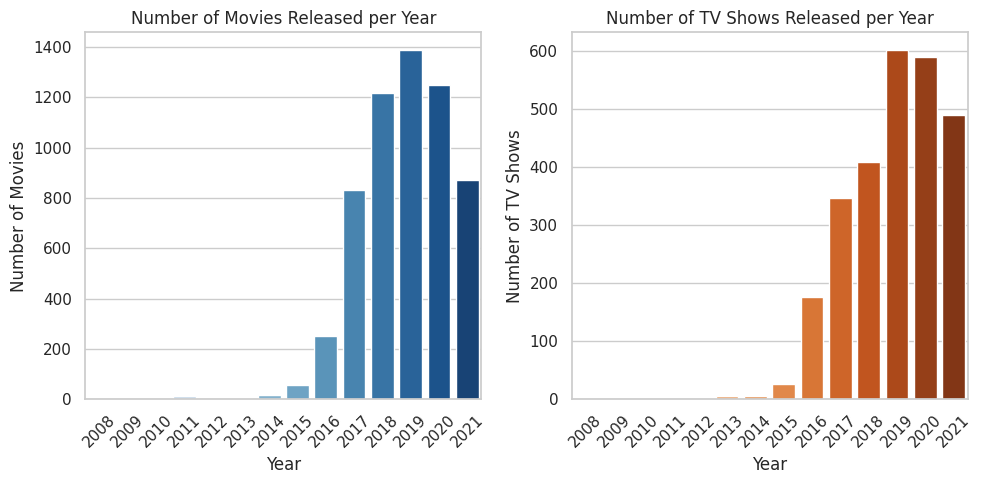

In [ ]:
# plot for Types vs year

sns.set(style="whitegrid")

#plot for movies
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.barplot(x='release_year', y='Movie', data=counts, palette='Blues')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

# Plot for TV Shows
plt.subplot(1, 2, 2)
sns.barplot(x='release_year', y='TV Show', data=counts, palette='Oranges')
plt.title('Number of TV Shows Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

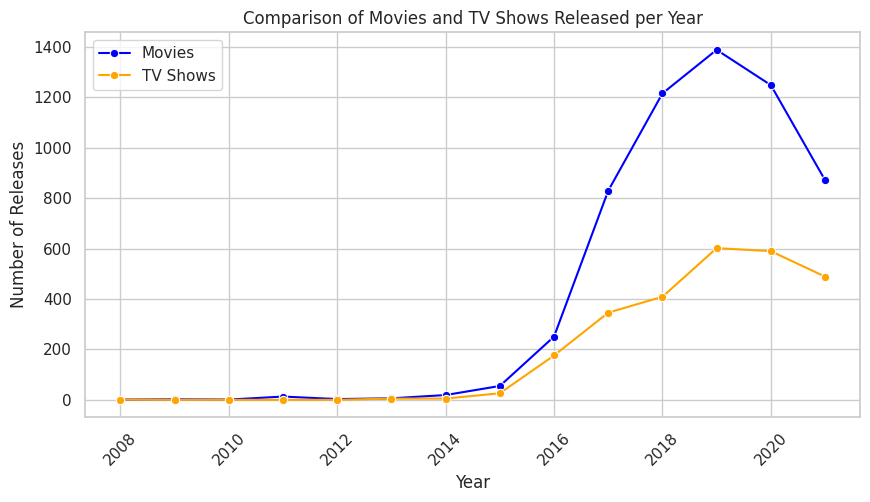

In [ ]:
# Combined Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='release_year', y='Movie', data=counts, marker='o', label='Movies', color='blue')
sns.lineplot(x='release_year', y='TV Show', data=counts, marker='o', label='TV Shows', color='orange')
plt.title('Comparison of Movies and TV Shows Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

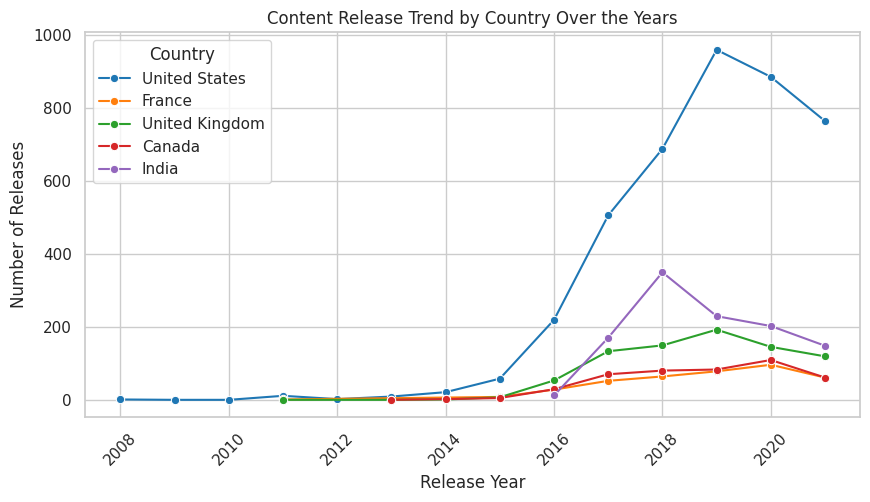

In [ ]:
# Grouping the data by release year and country, counting the number of releases

country_year=imputed_df[['show_id','release_year','country']]
country_year=country_year.drop_duplicates()
country_year_group = country_year.groupby(['release_year', 'country']).size().reset_index(name='count')

# Optionally, filter top countries based on total content count
top_countries = country_year_group.groupby('country')['count'].sum().nlargest(5).index  # Top 10 countries
filtered_df = country_year_group[country_year_group['country'].isin(top_countries)]

# Plotting the trends using Seaborn
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=filtered_df,
    x='release_year',
    y='count',
    hue='country',  # Different colors for different countries
    marker="o",
    palette="tab10"
)

# Customizing the plot
plt.title('Content Release Trend by Country Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Country', loc='upper left')

# Show the plot
plt.show()

In [ ]:
imputed_df.columns

Index(['show_id', 'cast', 'listed_in', 'director', 'country', 'type', 'title',
       'date_added', 'release_year', 'rating', 'description',
       'duration_magnitude', 'duration_type'],
      dtype='object')

What is the best time to launch a TV show and Movies?

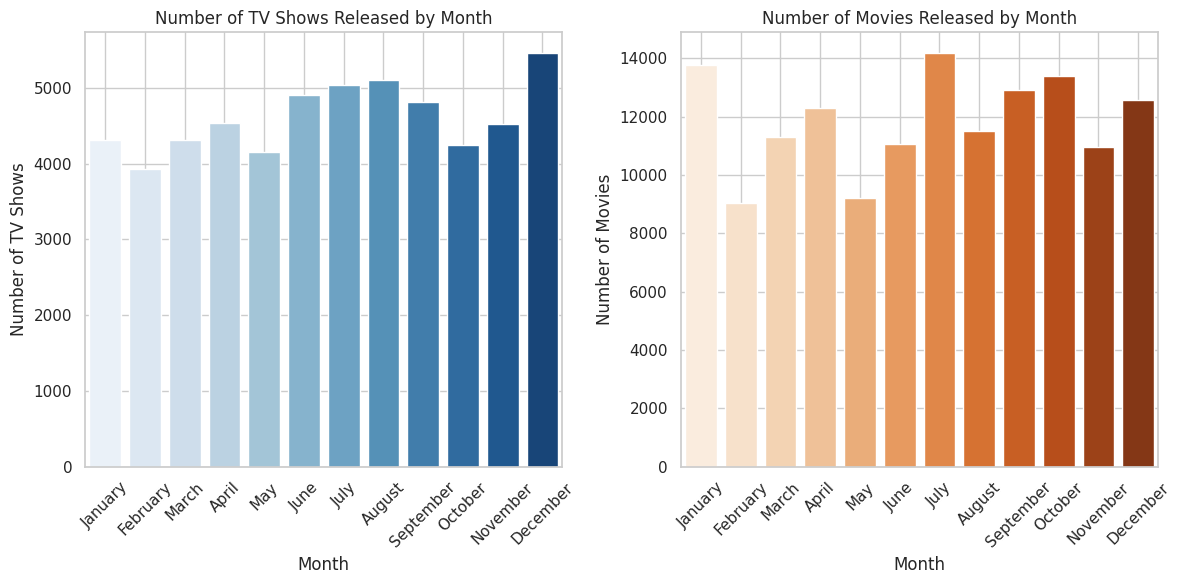

In [ ]:
# Define the correct order of months from January to December
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'month' column to Categorical type with correct order
imputed_df['month'] = imputed_df['date_added'].dt.month_name()
imputed_df['month'] = pd.Categorical(imputed_df['month'], categories=month_order, ordered=True)

# Function to group and count TV shows or movies by month
def group_by_month(df, content_type):
    return df[df['type'] == content_type].groupby('month').size().reset_index(name='count')

# Group by month for TV Shows and Movies
monthly_tv_shows_count = group_by_month(imputed_df, 'TV Show')
monthly_movies_count = group_by_month(imputed_df, 'Movie')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for TV Shows
sns.barplot(x='month', y='count', data=monthly_tv_shows_count, palette="Blues", order=month_order, ax=axes[0])
axes[0].set_title('Number of TV Shows Released by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of TV Shows')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Plot for Movies
sns.barplot(x='month', y='count', data=monthly_movies_count, palette="Oranges", order=month_order, ax=axes[1])
axes[1].set_title('Number of Movies Released by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Movies')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


Analysis of actors/directors of different types of shows/movies.

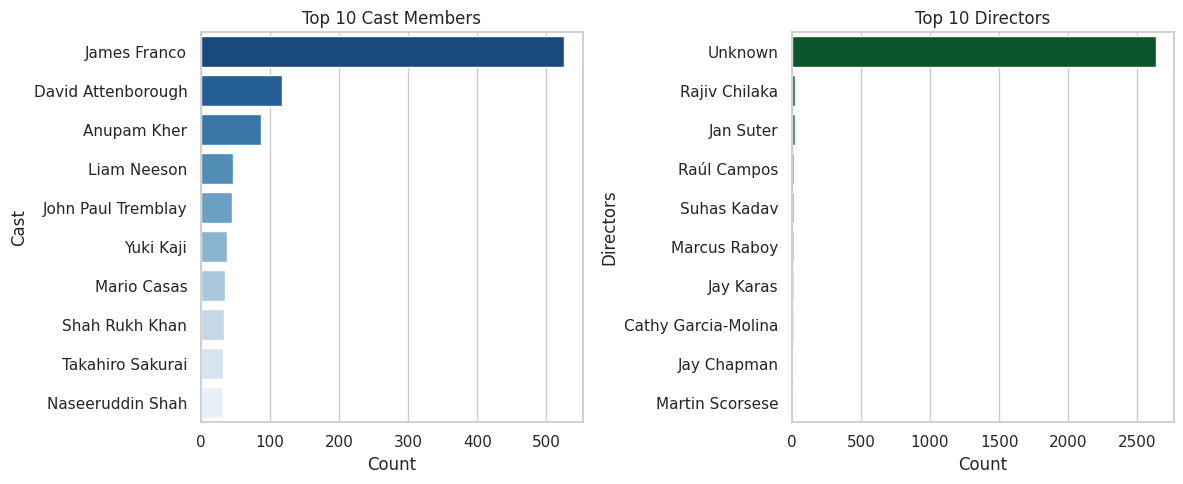

In [ ]:
# Removing duplicates for 'cast' (unique combinations of show_id and cast)
unique_cast_df = imputed_df[['show_id', 'cast']].drop_duplicates()

# Count the unique occurrences of each cast member
top_10_cast = (
    unique_cast_df['cast']
    .value_counts()
    .nlargest(10)
)

# Removing duplicates for 'director' (unique combinations of show_id and director)
unique_director_df = imputed_df[['show_id', 'director']].drop_duplicates()

# Count the unique occurrences of each director
top_10_directors = (
    unique_director_df['director']
    .value_counts()
    .nlargest(10)
)

# Plotting the top 10 cast members
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # First subplot for cast
sns.barplot(x=top_10_cast.values, y=top_10_cast.index, palette="Blues_r")
plt.title('Top 10 Cast Members')
plt.xlabel('Count')
plt.ylabel('Cast')

# Plotting the top 10 directors
plt.subplot(1, 2, 2)  # Second subplot for directors
sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette="Greens_r")
plt.title('Top 10 Directors')
plt.xlabel('Count')
plt.ylabel('Directors')

plt.tight_layout()
plt.show()


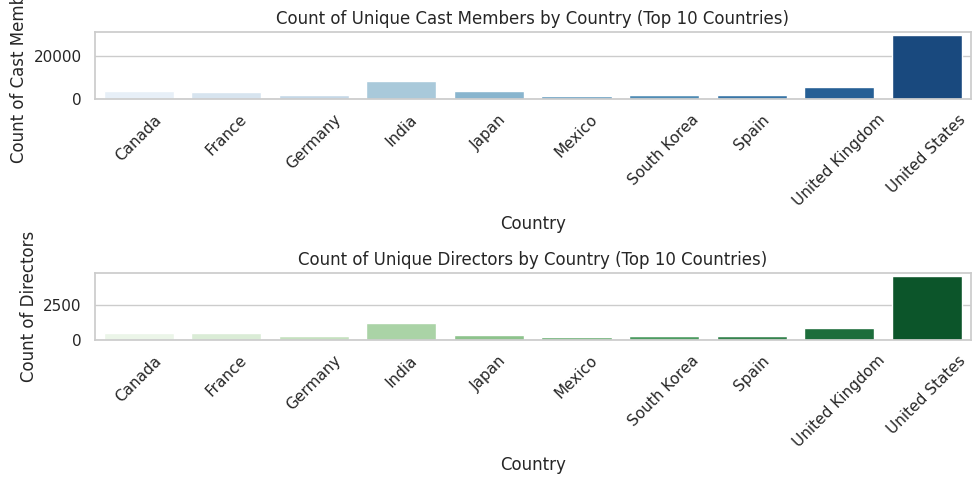

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Removing duplicates for 'cast' (unique combinations of show_id, cast, and country)
unique_cast_country_df = imputed_df[['show_id', 'cast', 'country']].drop_duplicates()

# Removing duplicates for 'director' (unique combinations of show_id, director, and country)
unique_director_country_df = imputed_df[['show_id', 'director', 'country']].drop_duplicates()

# Get the top 10 countries based on the total number of unique cast members
top_cast_countries = (
    unique_cast_country_df.groupby('country')
    .size()
    .nlargest(10)  # Top 10 countries based on unique cast members
    .index
)

# Get the top 10 countries based on the total number of unique directors
top_director_countries = (
    unique_director_country_df.groupby('country')
    .size()
    .nlargest(10)  # Top 10 countries based on unique directors
    .index
)

# Combine both top countries to find unique top 10 countries with maximum cast and directors
top_countries = set(top_cast_countries).union(set(top_director_countries))

# Filter the data for these top countries
filtered_cast_df = unique_cast_country_df[unique_cast_country_df['country'].isin(top_countries)]
filtered_director_df = unique_director_country_df[unique_director_country_df['country'].isin(top_countries)]

# Count unique cast members by country
cast_count_by_country = filtered_cast_df.groupby('country').size().reset_index(name='cast_count')

# Count unique directors by country
director_count_by_country = filtered_director_df.groupby('country').size().reset_index(name='director_count')

# Merging the counts into a single DataFrame
combined_counts = pd.merge(cast_count_by_country, director_count_by_country, on='country', how='outer')

# Plotting the counts for cast and directors using subplots
plt.figure(figsize=(10,5))

# Plotting cast counts
plt.subplot(2, 1, 1)
sns.barplot(
    data=combined_counts,
    x='country',
    y='cast_count',
    palette="Blues"
)
plt.title('Count of Unique Cast Members by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count of Cast Members')
plt.xticks(rotation=45)

# Plotting director counts
plt.subplot(2, 1, 2)
sns.barplot(
    data=combined_counts,
    x='country',
    y='director_count',
    palette="Greens"
)
plt.title('Count of Unique Directors by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count of Directors')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Does Netflix has more focus on TV Shows than movies in recent years

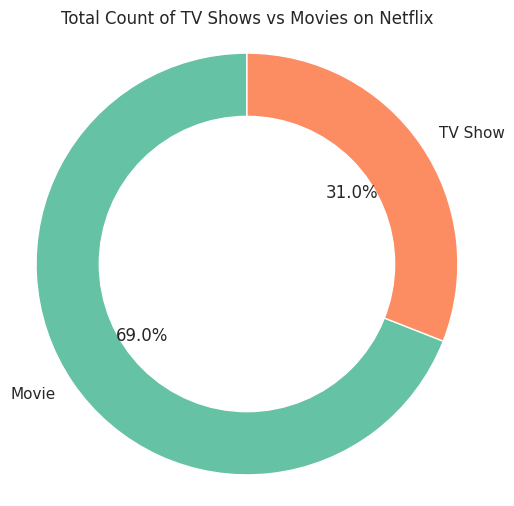

      type  count
0    Movie   5907
1  TV Show   2649


In [ ]:
# Assuming 'imputed_df' is your DataFrame with relevant columns
# Count unique show_ids for each type
type_counts = imputed_df[['show_id', 'type']].drop_duplicates().groupby('type').size().reset_index(name='count')

# Plotting the counts of TV Shows and Movies as a donut chart
plt.figure(figsize=(5, 5))

# Create a pie chart
plt.pie(
    type_counts['count'],
    labels=type_counts['type'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set2")
)

# Draw a circle at the center of pie to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, color='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Total Count of TV Shows vs Movies on Netflix')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

# Display the counts for reference
print(type_counts)



In [ ]:
imputed_df['listed_in']

,listed_in
0,Documentaries
1,Comedies
2,Dramas
3,Comedies
4,Dramas
...,...
201986,Docuseries
201987,International TV Shows
201988,International TV Shows
201989,Documentaries


Understanding what content is available in different countries

In [ ]:
imputed_df['listed_in'].value_counts().nlargest(10)

,count
listed_in,
Dramas,29228
International Movies,27244
Comedies,20408
International TV Shows,12637
Action & Adventure,11949
Independent Movies,9779
Children & Family Movies,9376
TV Dramas,8840
Thrillers,6971


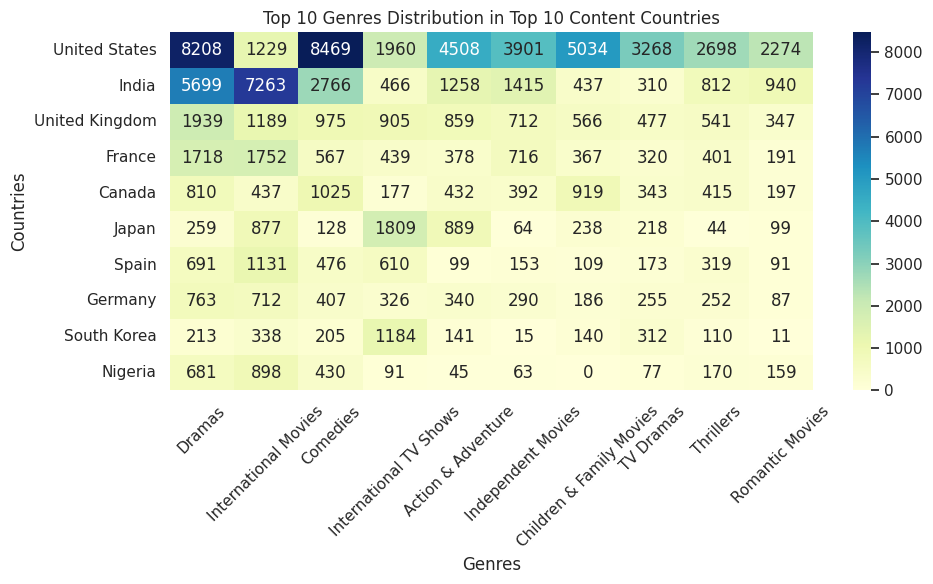

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get the top 10 genres based on their counts
top_genres = imputed_df['listed_in'].value_counts().nlargest(10).index

# Step 2: Filter the DataFrame for these top genres
filtered_df = imputed_df[imputed_df['listed_in'].isin(top_genres)]

# Step 3: Get the top 10 countries based on content count
top_countries = filtered_df['country'].value_counts().nlargest(10).index

# Step 4: Filter again for the top countries
final_df = filtered_df[filtered_df['country'].isin(top_countries)]

# Step 5: Group by country and genre and count the occurrences
genre_counts = (
    final_df.groupby(['country', 'listed_in'])
    .size()
    .unstack(fill_value=0)
)

# Step 6: Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    genre_counts.loc[top_countries, top_genres],
    cmap="YlGnBu",
    annot=True,  # Add counts in the cells
    fmt='d'      # Format as integer
)

plt.title('Top 10 Genres Distribution in Top 10 Content Countries')
plt.xlabel('Genres')
plt.ylabel('Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analysis
#print("Top 10 Countries with Most Content and Their Genre Counts:")
#print(genre_counts.loc[top_countries, top_genres])


Analysing duration magnitudes for the availaible content in netflix dataset using boxplots

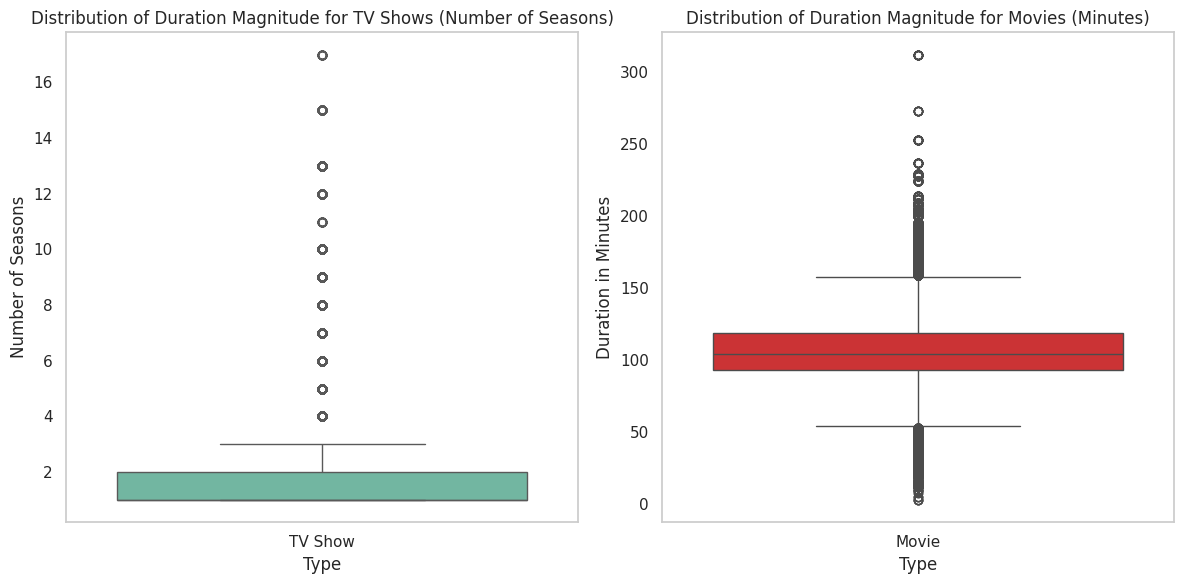

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Boxplot for TV shows (duration in episodes)
sns.boxplot(
    data=imputed_df[imputed_df['type'] == 'TV Show'],
    x='type',
    y='duration_magnitude',
    palette="Set2",
    ax=axes[0]
)

axes[0].set_title('Distribution of Duration Magnitude for TV Shows (Number of Seasons)')
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Number of Seasons')
axes[0].grid(axis='y')

# Boxplot for Movies (duration in minutes)
sns.boxplot(
    data=imputed_df[imputed_df['type'] == 'Movie'],
    x='type',
    y='duration_magnitude',
    palette="Set1",
    ax=axes[1]
)

axes[1].set_title('Distribution of Duration Magnitude for Movies (Minutes)')
axes[1].set_xlabel('Type')
axes[1].set_ylabel('Duration in Minutes')
axes[1].grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()
